In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio


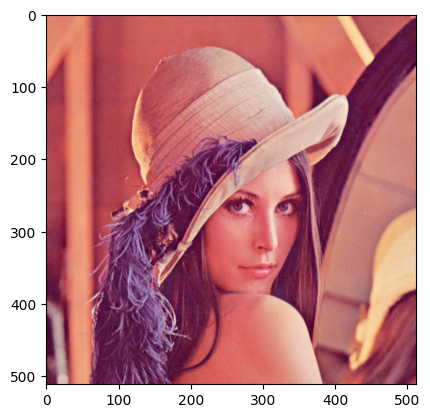

In [4]:
img_path = "lena.png"
img = plt.imread(img_path)
plt.imshow(img)

In [5]:
def add_speckle_noise(image, intensity):
    noise = np.random.randn(*image.shape) * intensity
    noise_img = image + noise
    return noise_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


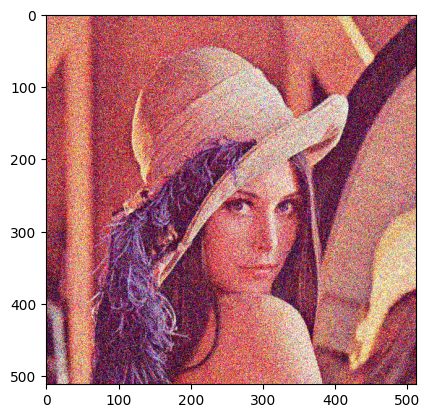

In [6]:
noisy_img = add_speckle_noise(img, 0.2)
plt.imshow(noisy_img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


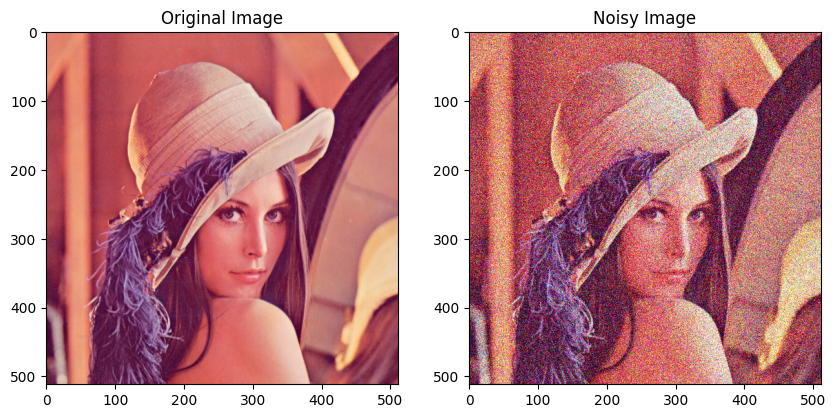

In [7]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

plt.show()

In [10]:

def calculate_psnr(original_image, compressed_image):
    # Convert images to float32 for PSNR calculation
    original_image = original_image.astype(float)
    compressed_image = compressed_image.astype(float)

    # Ensure images have the same shape
    min_shape = np.min([original_image.shape, compressed_image.shape], axis=0)
    original_image = original_image[:min_shape[0], :min_shape[1], :]
    compressed_image = compressed_image[:min_shape[0], :min_shape[1], :]

    # Calculate the PSNR using scikit-image
    psnr_value = peak_signal_noise_ratio(original_image, compressed_image, data_range=255)

    return psnr_value

In [13]:
psnrval = calculate_psnr(img, noisy_img)
print(f"PSNR value is {psnrval:.2f} dB")


PSNR value is 62.12 dB


In [17]:
from scipy.ndimage import gaussian_filter

def apply_gaussian_filter(image, sigma):
    filtered_image = gaussian_filter(image, sigma=(sigma, sigma, 0))
    return filtered_image

In [29]:
kernel_sizes = [3, 5, 7, 9, 11, 13, 15]
gaussian_filtered_images = []

for kernel_size in kernel_sizes:
    sigma = kernel_size / 6 
    filtered_image = apply_gaussian_filter(noisy_img, sigma)
    gaussian_filtered_images.append(filtered_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


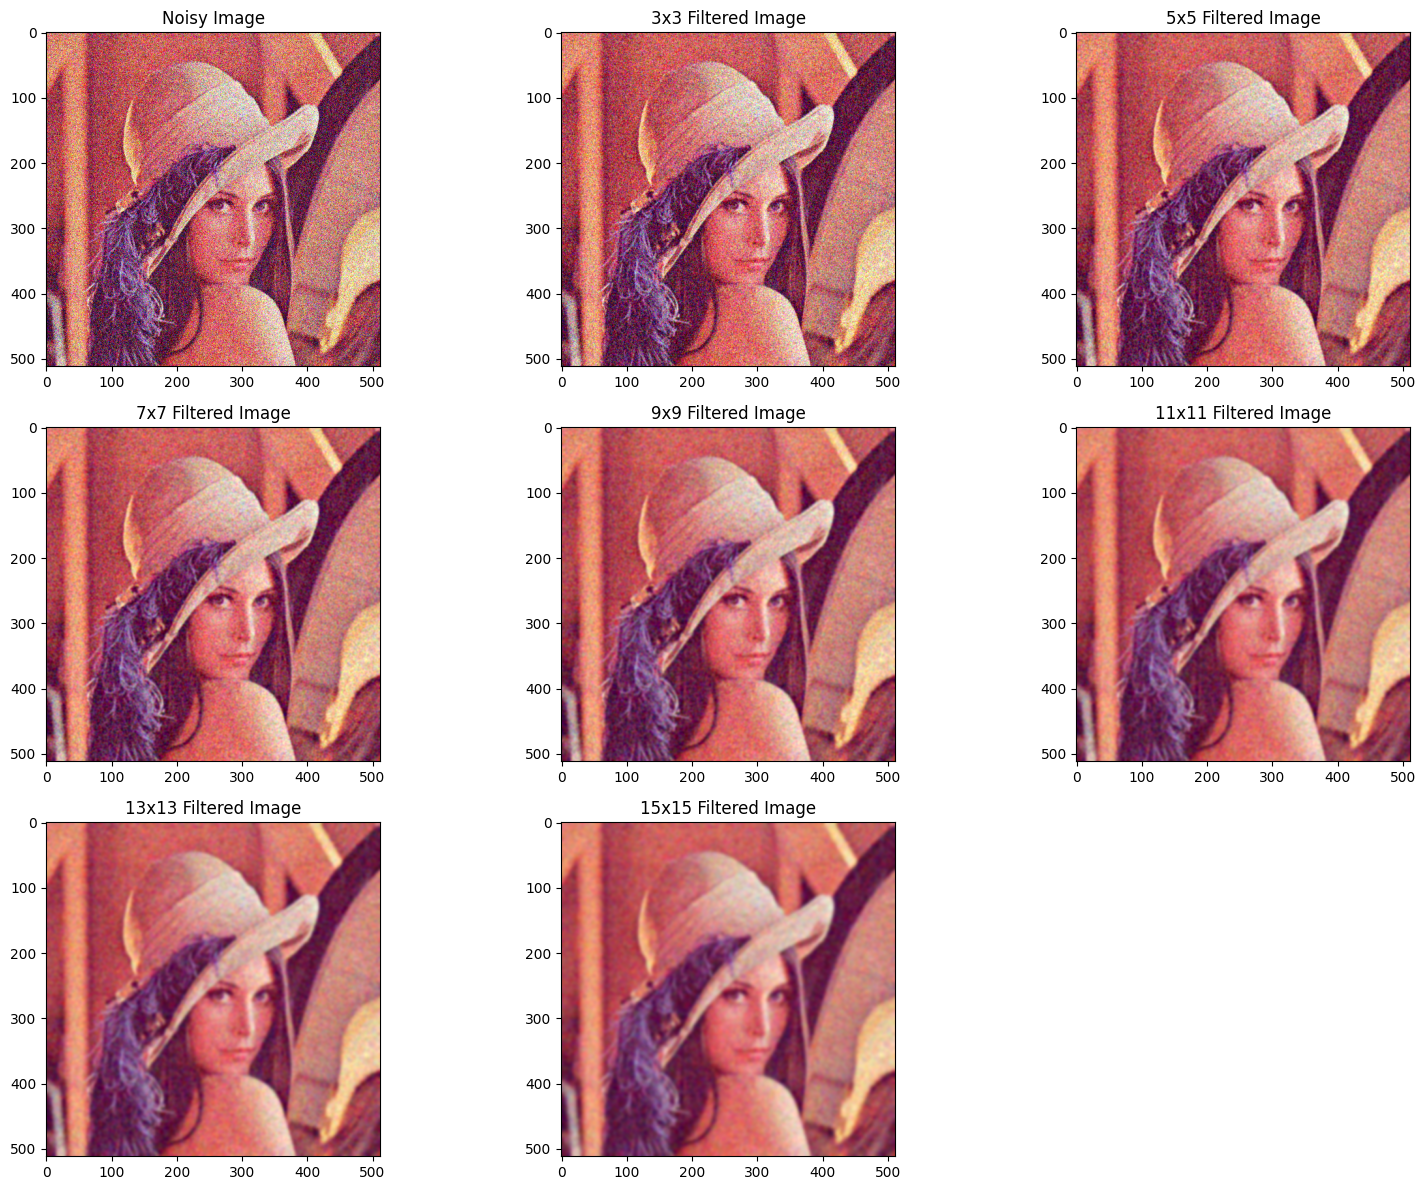

In [30]:
plt.figure(figsize=(16, 12))

# Display the original noisy image
plt.subplot(3, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

# Iterate over the filtered images and display them
for i, filtered_image in enumerate(gaussian_filtered_images, start=2):
    plt.subplot(3, 3, i)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'{kernel_sizes[i-2]}x{kernel_sizes[i-2]} Filtered Image')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the figure
plt.show()

In [31]:
for i, filtered_image in enumerate(gaussian_filtered_images, start=1):
    psnr = calculate_psnr(noisy_img, filtered_image)
    print(f"PSNR for {kernel_sizes[i-1]}x{kernel_sizes[i-1]} Filtered Image: {psnr:.2f} dB")

PSNR for 3x3 Filtered Image: 69.67 dB
PSNR for 5x5 Filtered Image: 63.88 dB
PSNR for 7x7 Filtered Image: 62.87 dB
PSNR for 9x9 Filtered Image: 62.48 dB
PSNR for 11x11 Filtered Image: 62.29 dB
PSNR for 13x13 Filtered Image: 62.16 dB
PSNR for 15x15 Filtered Image: 62.07 dB
